In [1]:
import yfinance as yf
import pandas as pd

In [6]:
# Define the ticker symbols
tickers = ['TSLA', 'BND', 'SPY']

# Fetch historical data from January 1, 2015, to January 31, 2025
data = yf.download(tickers, start='2015-01-01', end='2025-01-31')

[*********************100%***********************]  3 of 3 completed


In [7]:
data

Price           Close                               High              \
Ticker            BND         SPY        TSLA        BND         SPY   
Date                                                                   
2015-01-02  62.573105  172.592865   14.620667  62.603389  173.811099   
2015-01-05  62.754814  169.475922   14.006000  62.777526  171.702325   
2015-01-06  62.936497  167.879593   14.085333  63.125768  170.316035   
2015-01-07  62.974384  169.971588   14.063333  63.050092  170.316054   
2015-01-08  62.875961  172.987778   14.041333  62.921385  173.206226   
...               ...         ...         ...        ...         ...   
2025-01-24  71.805977  607.969971  406.579987  71.855810  610.780029   
2025-01-27  72.184738  599.369995  397.149994  72.204677  599.690002   
2025-01-28  72.144867  604.520020  398.089996  72.154837  605.369995   
2025-01-29  72.104996  601.809998  389.100006  72.254510  604.130005   
2025-01-30  72.204674  605.039978  400.279999  72.294378  606.599976   

Price                         Low                               Open  \
Ticker            TSLA        BND         SPY        TSLA        BND   
Date                                                                   
2015-01-02   14.883333  62.398973  171.542672   14.217333  62.406545   
2015-01-05   14.433333  62.610966  169.165069   13.810667  62.641250   
2015-01-06   14.280000  62.860789  167.073039   13.614000  62.860789   
2015-01-07   14.318667  62.875965  168.770174   13.985333  62.944100   
2015-01-08   14.253333  62.815393  171.383093   14.000667  62.921385   
...                ...        ...         ...         ...        ...   
2025-01-24  418.880005  71.636531  606.799988  405.779999  71.766106   
2025-01-27  406.690002  72.025262  594.640015  389.000000  72.104996   
2025-01-28  400.589996  71.975421  597.250000  386.500000  72.154837   
2025-01-29  398.589996  71.935550  599.219971  384.480011  72.194707   
2025-01-30  412.500000  72.144864  600.719971  384.410004  72.224605   

Price                                Volume                       
Ticker             SPY        TSLA      BND        SPY      TSLA  
Date                                                              
2015-01-02  173.391022   14.858000  2218800  121465900  71466000  
2015-01-05  171.534297   14.303333  5820100  169632600  80527500  
2015-01-06  169.786733   14.004000  3887600  209151400  93928500  
2015-01-07  169.223851   14.223333  2433400  125346700  44526000  
2015-01-08  171.399886   14.187333  1873400  147217800  51637500  
...                ...         ...      ...        ...       ...  
2025-01-24  609.809998  414.450012  5555700   34604700  56427100  
2025-01-27  594.809998  394.799988  8621200   70361100  58125500  
2025-01-28  600.619995  396.910004  4424300   44433300  48910700  
2025-01-29  603.719971  395.209991  5780200   37177400  68033600  
2025-01-30  603.960022  410.779999  5622300   39281300  98092900  

[2535 rows x 15 columns]

In [8]:
data.columns

MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'SPY'),
            ( 'Close', 'TSLA'),
            (  'High',  'BND'),
            (  'High',  'SPY'),
            (  'High', 'TSLA'),
            (   'Low',  'BND'),
            (   'Low',  'SPY'),
            (   'Low', 'TSLA'),
            (  'Open',  'BND'),
            (  'Open',  'SPY'),
            (  'Open', 'TSLA'),
            ('Volume',  'BND'),
            ('Volume',  'SPY'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [10]:
#Extract only the 'Close' prices for simplicity
close_data = data['Close']
close_data.to_csv('historical_close_prices.csv')  # Save for later use

print("Data successfully loaded and saved.")

Data successfully loaded and saved.


### Data Cleaning and Understanding

In [11]:
# Check basic statistics
print(close_data.describe())

Ticker          BND          SPY         TSLA
count   2535.000000  2535.000000  2535.000000
mean      69.289450   316.067402   117.848209
std        4.792145   117.926910   116.508288
min       61.860916   156.800842     9.578000
25%       65.565273   214.841972    17.228000
50%       68.329132   277.117920    30.298000
75%       72.879929   405.869202   221.525002
max       78.823273   609.750000   479.859985


In [12]:
# Check for missing values
missing_values = close_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(close_data), columns=close_data.columns, index=close_data.index)

### Exploratory Data Analysis 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

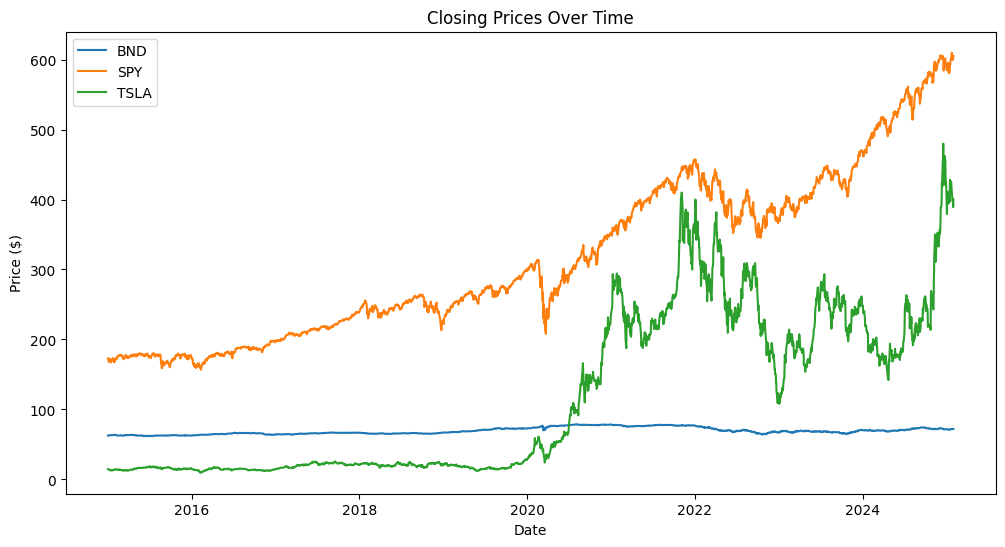

In [16]:
# Visualize closing prices
plt.figure(figsize=(12, 6))
for asset in close_data.columns:
    plt.plot(close_data[asset], label=asset)
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [17]:
# Calculate daily percentage change
daily_returns = close_data.pct_change().dropna()
print("Daily Returns:\n", daily_returns.describe())

Daily Returns:
 Ticker          BND          SPY         TSLA
count   2534.000000  2534.000000  2534.000000
mean       0.000062     0.000557     0.001952
std        0.003427     0.011083     0.036005
min       -0.054385    -0.109424    -0.210628
25%       -0.001527    -0.003702    -0.016241
50%        0.000124     0.000601     0.001260
75%        0.001729     0.005929     0.019256
max        0.042202     0.090603     0.219190


In [18]:
# Analyze volatility (rolling mean and std)
rolling_mean = close_data.rolling(window=30).mean()
rolling_std = close_data.rolling(window=30).std()

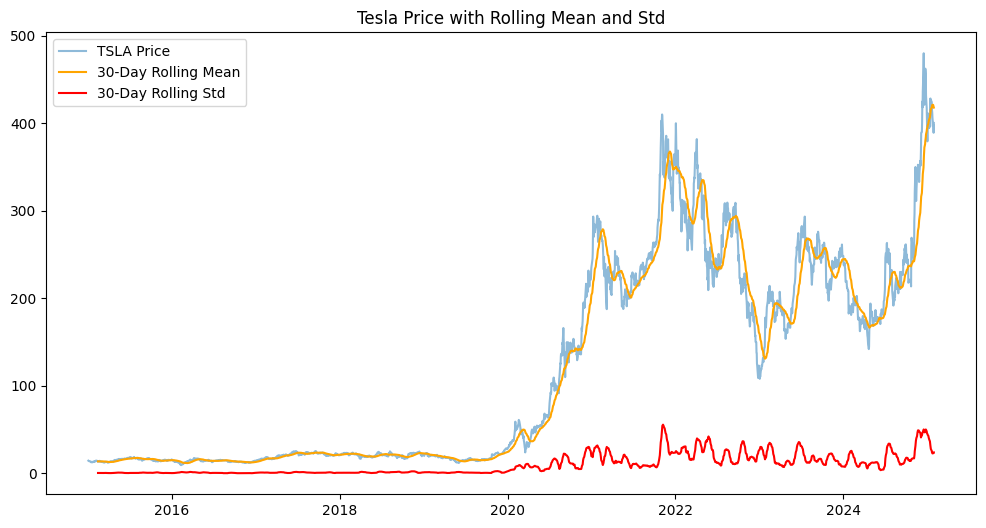

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(close_data['TSLA'], label='TSLA Price', alpha=0.5)
plt.plot(rolling_mean['TSLA'], label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std['TSLA'], label='30-Day Rolling Std', color='red')
plt.title("Tesla Price with Rolling Mean and Std")
plt.legend()
plt.show()

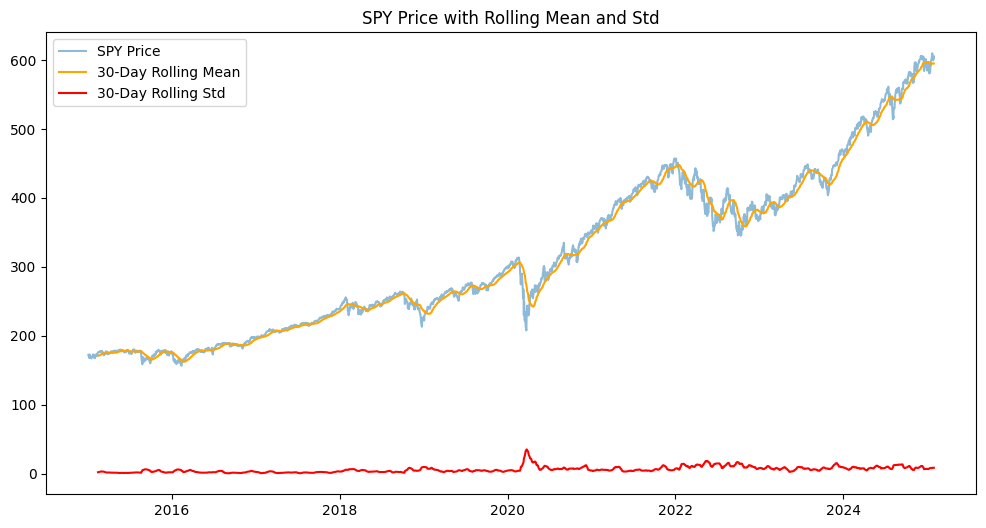

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(close_data['SPY'], label='SPY Price', alpha=0.5)
plt.plot(rolling_mean['SPY'], label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std['SPY'], label='30-Day Rolling Std', color='red')
plt.title("SPY Price with Rolling Mean and Std")
plt.legend()
plt.show()

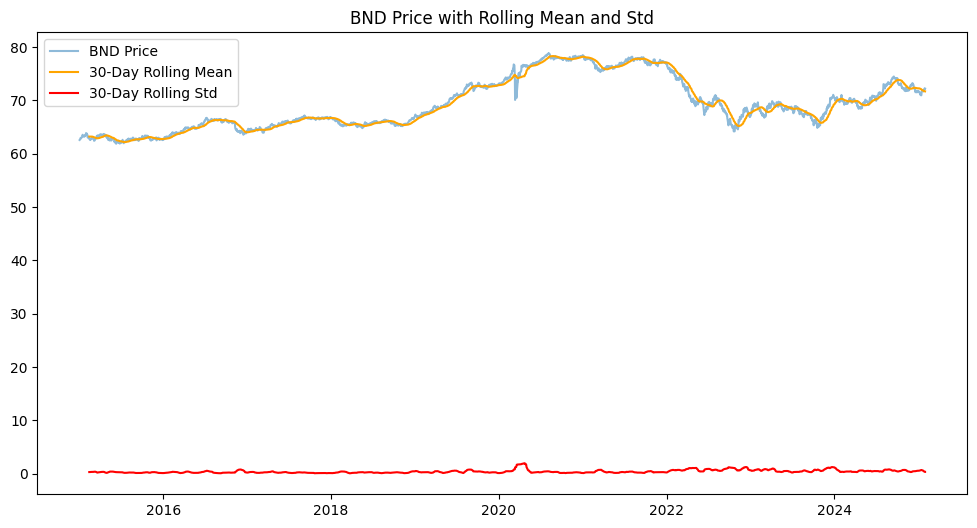

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(close_data['BND'], label='BND Price', alpha=0.5)
plt.plot(rolling_mean['BND'], label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std['BND'], label='30-Day Rolling Std', color='red')
plt.title("BND Price with Rolling Mean and Std")
plt.legend()
plt.show()

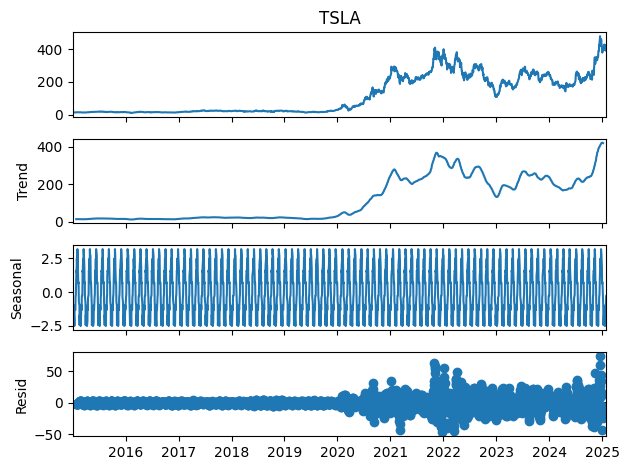

In [ ]:
# Decompose time series 
decomposition = seasonal_decompose(close_data['TSLA'].dropna(), model='additive', period=30)
decomposition.plot()
plt.show()

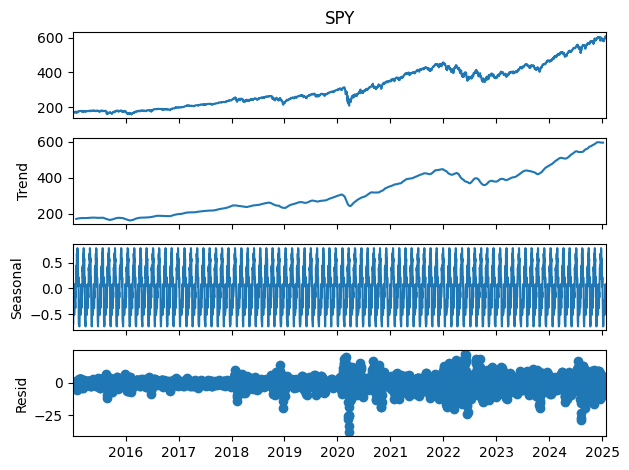

In [23]:
# Decompose time series 
decomposition = seasonal_decompose(close_data['SPY'].dropna(), model='additive', period=30)
decomposition.plot()
plt.show()

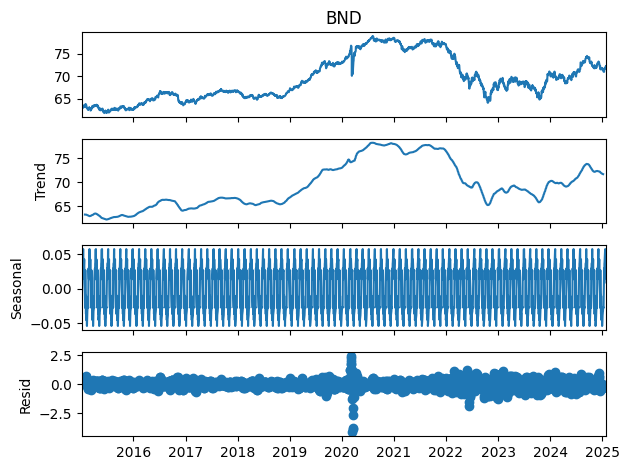

In [24]:
# Decompose time series 
decomposition = seasonal_decompose(close_data['BND'].dropna(), model='additive', period=30)
decomposition.plot()
plt.show()

# Time Series Analysis Findings

## 1️⃣ BND (Bond ETF)
- **Trend:** Gradual increase until 2020, followed by a decline and recovery.  
- **Seasonality:** Small fluctuations with a clear cyclic pattern.  
- **Residuals:** Noticeable spikes around 2020, indicating market shocks.  

## 2️⃣ SPY (S&P 500 ETF)
- **Trend:** Strong long-term upward trend with some dips, especially around 2020.  
- **Seasonality:** High-frequency fluctuations, likely due to market cycles.  
- **Residuals:** More volatility post-2020, possibly due to economic events.  

## 3️⃣ TSLA (Tesla)
- **Trend:** Steep rise post-2019, aligning with Tesla’s growth.  
- **Seasonality:** Regular patterns, suggesting cyclical behavior.  
- **Residuals:** Increasing fluctuations, especially in recent years, indicating higher volatility.  